In [1]:
import matplotlib.pyplot as plt
import numpy as np

from src.main_pipeline import *

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
%matplotlib inline

In [4]:
import os
os.getcwd()

'C:\\Users\\Sheffield_lab\\PycharmProjects\\subprep\\jupyter'

# Load data

In [147]:
# load sample data (roi by time frame)
# note: if using suite2p, use all ROIs by loading F.npy file for channel1 and F_chan2.npy for channel2

raw = np.load('D:\\Dendrite\\AD7_0711_apical_suite2p\\plane0\\F.npy')
raw.shape   # note: not the full dataset, suite2p will return 5000 rois for any given axon FOV

(3071, 30000)

In [148]:
# apply smoothing filter. Optional: can be any denoising filter

data = smooth_data(raw)

In [115]:
import bisect

In [149]:
removed_roi = np.where(np.sum(raw, axis=1)==0)[0]
potential_roi = [5, 53, 91, 101, 506]
neg_ind = [bisect.bisect_right(removed_roi, x) for x in potential_roi]
np.array(potential_roi) - neg_ind

array([  5,  46,  75,  83, 462])

Text(0.5, 1.0, 'example cell: raw')

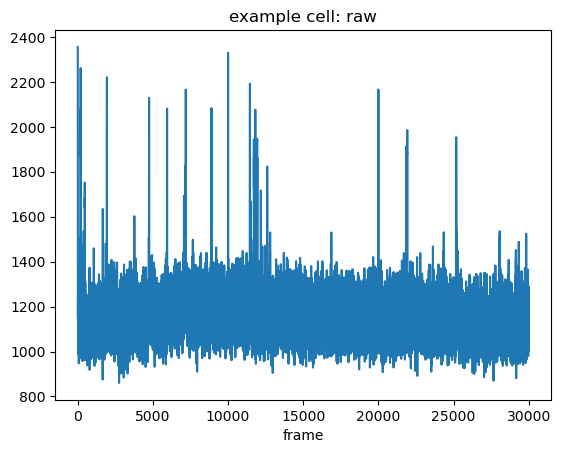

In [150]:
plt.plot(raw[5, :])
plt.xlabel('frame')
plt.title('example cell: raw')

Text(0.5, 1.0, 'example cell: smoothed')

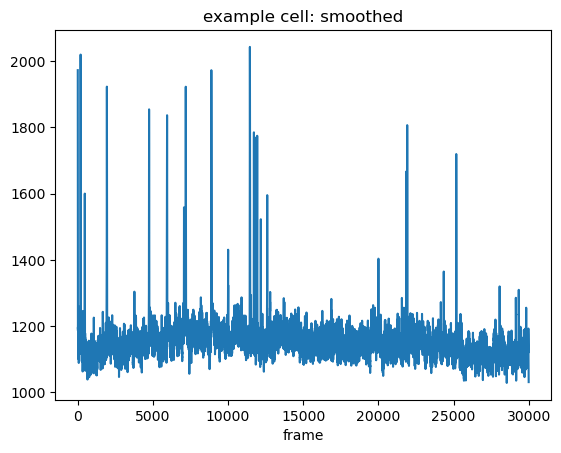

In [151]:
plt.plot(data[5, :])
plt.xlabel('frame')
plt.title('example cell: smoothed')

# ROI selection

In [152]:
roi = SelectROI(fs=30.98)

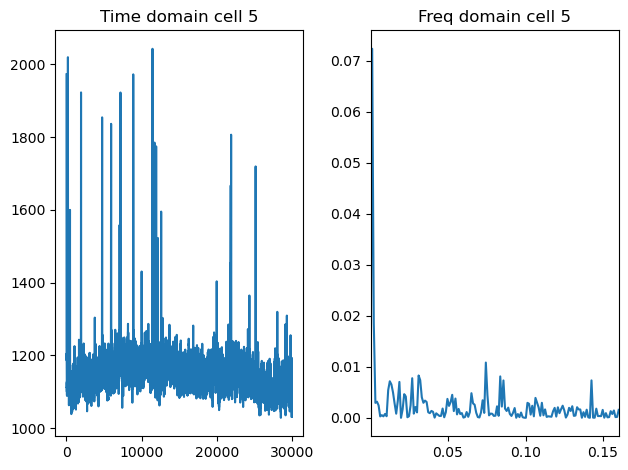

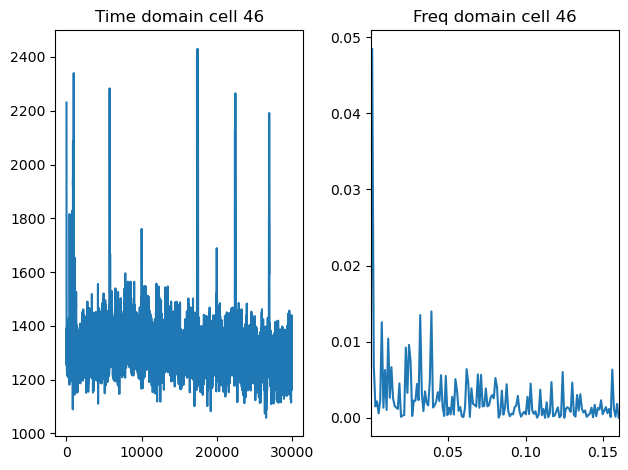

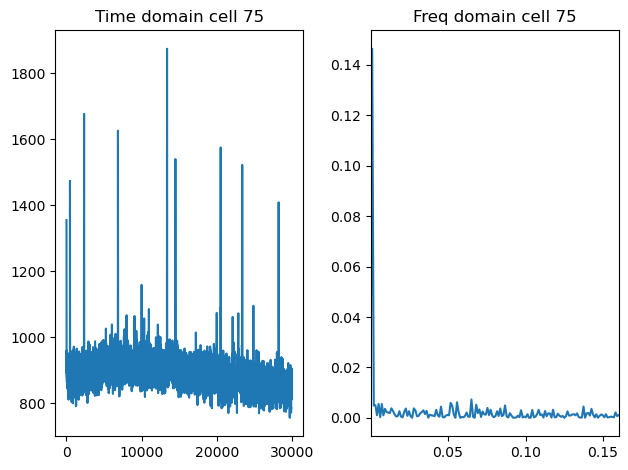

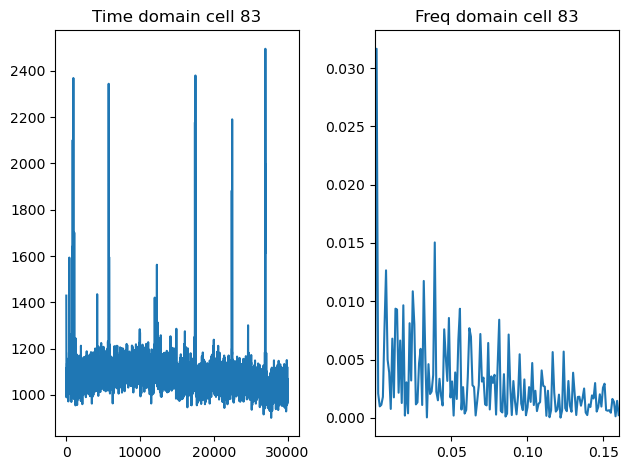

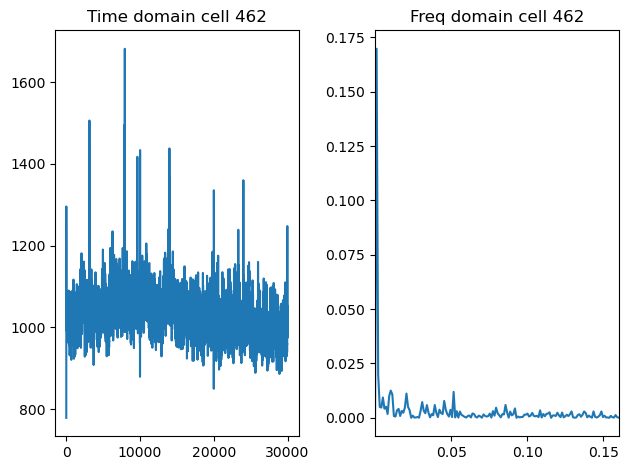

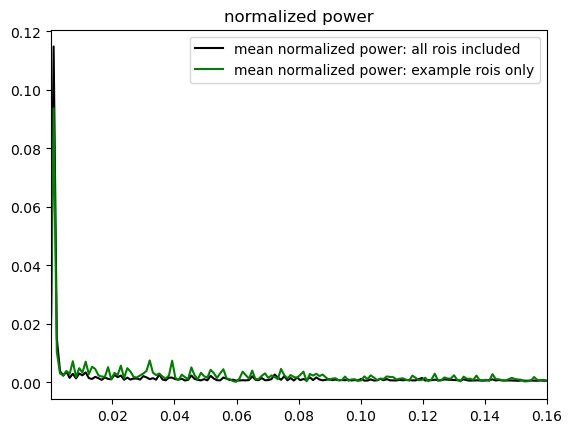

In [153]:
roi.plot_norm_power(data, [5,46,75,83,462])

In [154]:
# adjust freq bands selection criterion by looking at freq bands that have the biggest difference between green (good rois) and black (average noisy rois)
roi.transients_high=0.20
roi.transients_low=0.008

Transients high set to: 0.2 Hz
Transients low set to: 0.008 Hz


198 rois selected using power > 0.3


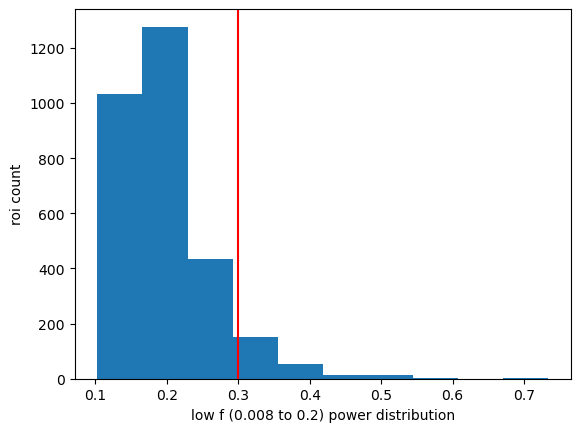

array([  77,  129,   55,  150, 1700,  169, 2476,  685,   10, 1235, 2647,
          5, 1785,   20, 1750,   44,   21, 1164,   92,   48, 2466, 1730,
         89, 2529,   63,  885,   35,  627,  772, 1155, 1224,  463, 1410,
         34,   19, 1323,  925, 1628, 1284, 1898, 1946,   76,  680, 1510,
       1128,  778,   46, 2158,  596,   83,  256,  842,  103,  662, 1105,
         98,   64, 1038,  694, 1308,   47,  877,  828, 1932,  677, 2252,
        409, 1674,  964,  571, 1259,  134, 2909, 2740,   36,  145, 1625,
       2544, 2241, 1505,  943, 1705,   14,  624,  507,  475, 1007,  611,
       2726, 1982,  218, 1849,  843, 1192,  975, 1343, 1678, 1959,  565,
       1496, 1587, 2217,  682,  840, 1760, 1461,  655, 1103, 2559, 1900,
        939,  845,  639,  544,  886,  809, 1873, 1058,  786,  248,  765,
        530, 1524,  864,  206,  514,  647, 1333,  617,  951, 2039, 1641,
       1021,  318,  740,  904, 1418,  972, 2271, 2702,  769, 2059,  723,
        918, 1182,  920, 2750, 1229,  787, 1046,  9

In [155]:
roi.rank_rois(data)

In [156]:
# move ratio lower to include more rois. lower thresh: more rois more false positives; higher thresh: less rois more false negatives
roi.norm_power_thresh=0.3

Norm power threshold set to 0.3


198 rois selected using power > 0.3


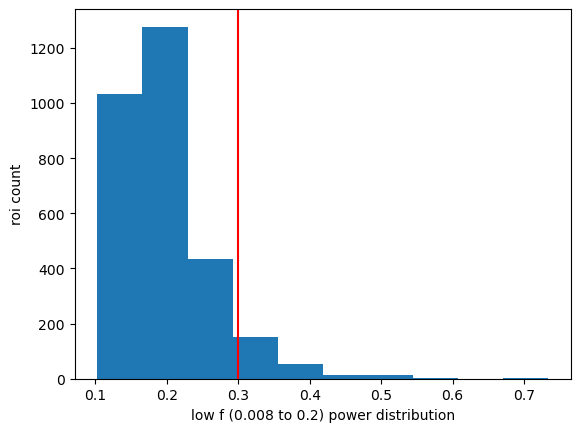

In [157]:
# rerun to include more rois. output rois are ranked in order
rois = roi.rank_rois(data)

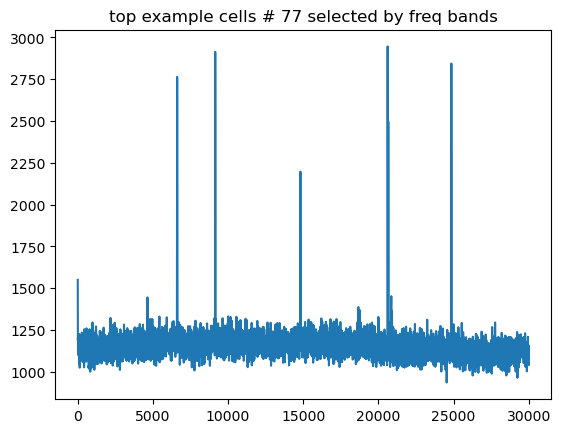

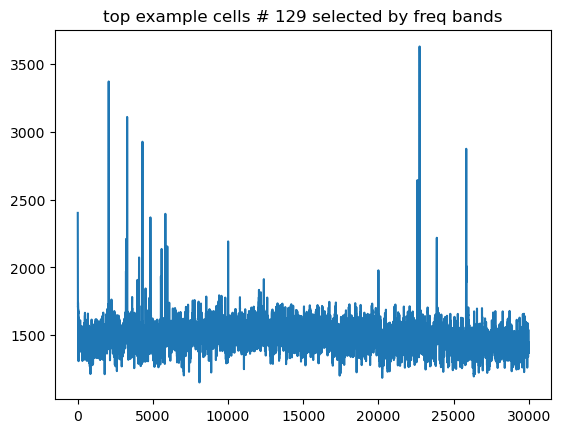

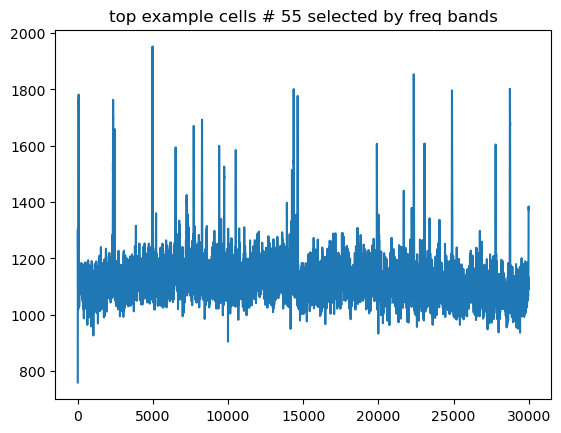

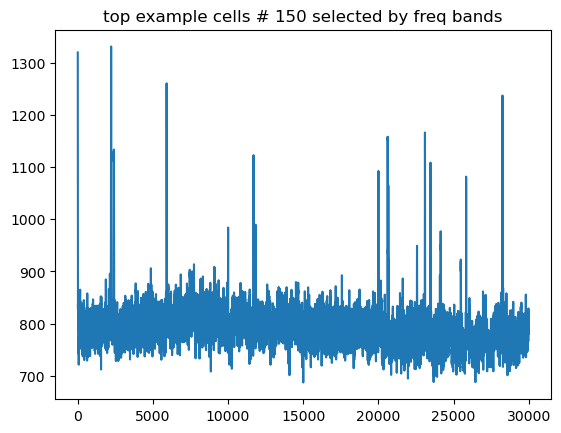

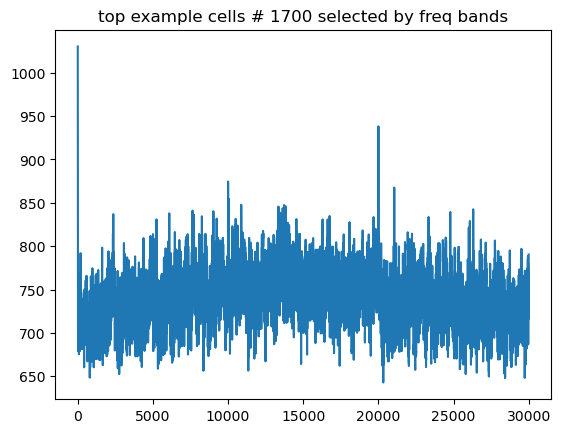

In [158]:
for n in range(5):
    plt.plot(data[rois[n], :])
    plt.title(f'top example cells # {rois[n]} selected by freq bands')
    plt.show()

# Motion detection

Current complexity is $O(nlogn)$
<br>
Two ways to speed up motion detection if you have a large dataset (long time periods)
1. separate the dataset to different time chunks (eg. based on tasks, time duration etc.) to reduce the size of each chunk and run it multiple times
2. use a large number for `jump` parameter in `detect_motion`. Note: tradeoff between accuracy and speed


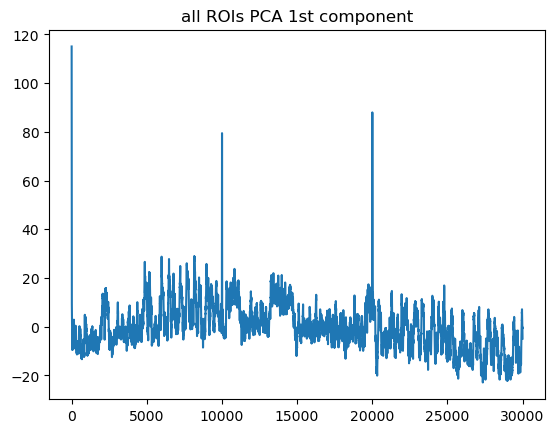

Enter the number of change points to detect (e.g. 4):  11


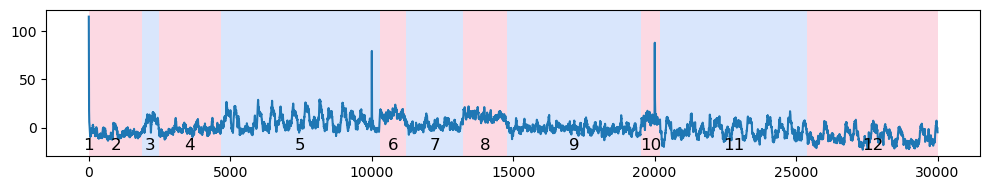

Is the segmentation result good? (yes/no):  yes
Enter the numbers of segments to replace with NaN, separated by spaces (e.g. 1 3), or press Enter to keep all:  3 6 8 10
Enter the numbers of segments to add as new ROIs, separated by spaces to add multiple segments as the same FOV (e.g. 1 3) or iteratively as separate FOVs (e.g. 1), or press Enter to skip:  


Finished. Now data in shape: (198, 30000)


In [159]:

data, change_points = detect_motion(data, rois, jump=5)

# follow the prompt to select segments: press Ctrl+Enter to return
# example user inputs: 5, yes, 2 5, ,

# Transient detection and axon grouping

In [178]:
from src.main_pipeline import detect_transients_only, detect_transients_axons, _separate_fov
from src.transient_detection import *

In [204]:
transients, rois_only = detect_transients_only(data, rois)

Text(0.5, 1.0, 'example cell: smoothed')

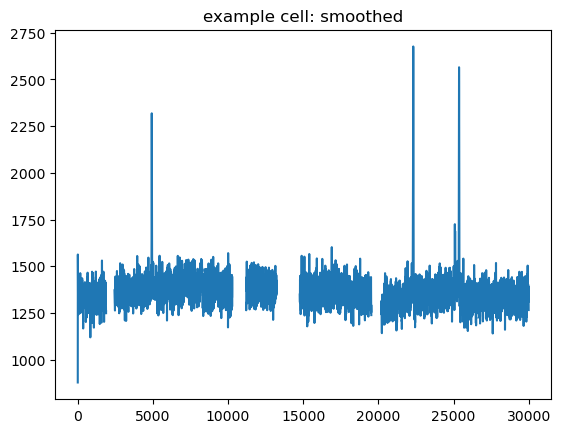

In [205]:
plt.plot(data[5, :])
plt.title('example cell: smoothed')

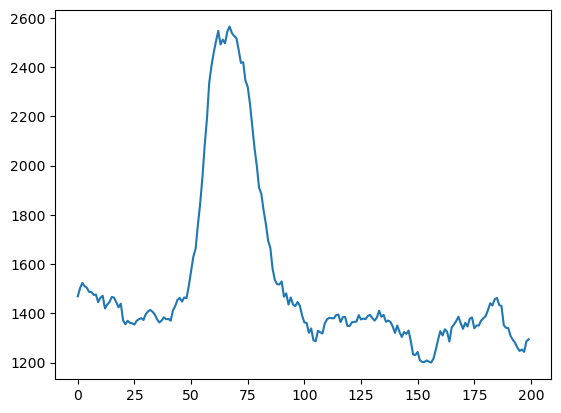

In [212]:
plt.plot(data[5, 25300:25500])


Text(0.5, 1.0, 'example cell: transients only (optional step - can be replaced with any other filter)')

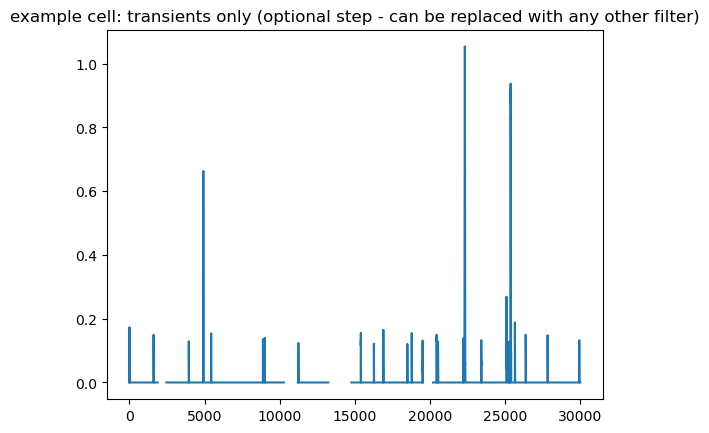

In [206]:
plt.plot(transients[5, :])
plt.title('example cell: transients only (optional step - can be replaced with any other filter)')